# Main Project

 Providing a dataset of employees working in ABC company. It consists of 458 rows and 9
columns. The company needs the detailed report and explanation of their employees in each
team, also need to identify the following:
1.How many are there in each Team and the percentage splitting with respect to the total
employees.
2.Segregate the employees w.r.t different positions.
3.Find from which age group most of the employees belong to.
4.Find out under which team and position, spending in terms of salary is high.
5.Find if there is any correlation between age and salary , represent it visually.
Before doing the above questions,perform pre processing of the dataset. Also, the column
height is having incorrect data, changing the data of that particular column with any random
numbers between 150 and 180.


In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv("myexcel.csv")
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [35]:
df.describe(include='all')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
count,458,458,458.000000,458,458.000000,458,458.000000,374,4.470000e+02
unique,458,30,NaN,5,NaN,18,NaN,118,NaN
top,Avery Bradley,New Orleans Pelicans,NaN,SG,NaN,06-Sep,NaN,Kentucky,NaN
freq,1,19,NaN,102,NaN,59,NaN,22,NaN
mean,NaN,NaN,17.713974,NaN,26.934498,NaN,221.543668,NaN,4.833970e+06
std,NaN,NaN,15.966837,NaN,4.400128,NaN,26.343200,NaN,5.226620e+06
min,NaN,NaN,0.000000,NaN,19.000000,NaN,161.000000,NaN,3.088800e+04
25%,NaN,NaN,5.000000,NaN,24.000000,NaN,200.000000,NaN,1.025210e+06
50%,NaN,NaN,13.000000,NaN,26.000000,NaN,220.000000,NaN,2.836186e+06
75%,NaN,NaN,25.000000,NaN,30.000000,NaN,240.000000,NaN,6.500000e+06


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [37]:
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [38]:
df.fillna(value={'College':'Unknown','Salary':0})

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,0.0
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,Unknown,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,Unknown,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,Unknown,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [39]:
df.duplicated().sum()

0

In [106]:
df['Height'] = np.random.randint(150, 181, size=len(df))
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,154,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,166,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,173,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,154,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,155,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,171,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,157,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,163,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,162,231,Kansas,947276.0


### How many are there in each Team and the percentage splitting with respect to the total employees.

In [40]:
df['Team']

0      Boston Celtics
1      Boston Celtics
2      Boston Celtics
3      Boston Celtics
4      Boston Celtics
            ...      
453         Utah Jazz
454         Utah Jazz
455         Utah Jazz
456         Utah Jazz
457         Utah Jazz
Name: Team, Length: 458, dtype: object

In [41]:
df['Team'].value_counts()

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [43]:
team_counts=df['Team'].value_counts()
df1=pd.DataFrame(team_counts)
df1
df1['Percentage']=(df1['count']/df1['count'].sum())*100
df1

,count,Percentage
Team,,
New Orleans Pelicans,19,4.148472
Memphis Grizzlies,18,3.930131
Utah Jazz,16,3.493450
New York Knicks,16,3.493450
Milwaukee Bucks,16,3.493450
Brooklyn Nets,15,3.275109
Portland Trail Blazers,15,3.275109
Oklahoma City Thunder,15,3.275109
Denver Nuggets,15,3.275109


### Segregate the employees w.r.t different positions

In [45]:
df['Position'].value_counts()

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [52]:
positions = df['Position'].unique()
positions

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [74]:
for position in positions:
    print(f"Position:{position}")
    employees=df[df['Position'] == position]
    print(employees)   

Position:PG
              Name                    Team  Number Position  Age  Height  \
0    Avery Bradley          Boston Celtics       0       PG   25  06-Feb   
8     Terry Rozier          Boston Celtics      12       PG   22  06-Feb   
9     Marcus Smart          Boston Celtics      36       PG   22  06-Apr   
11   Isaiah Thomas          Boston Celtics       4       PG   27  05-Sep   
19    Jarrett Jack           Brooklyn Nets       2       PG   32  06-Mar   
..             ...                     ...     ...      ...  ...     ...   
440  Brian Roberts  Portland Trail Blazers       2       PG   30  06-Jan   
443     Trey Burke               Utah Jazz       3       PG   23  06-Jan   
445     Dante Exum               Utah Jazz      11       PG   20  06-Jun   
453   Shelvin Mack               Utah Jazz       8       PG   26  06-Mar   
454      Raul Neto               Utah Jazz      25       PG   24  06-Jan   

     Weight         College     Salary  
0       180           Texas  77303

### Find from which age group most of the employees belong to.

In [75]:
df['Age'].unique()

array([25, 27, 22, 29, 21, 24, 20, 26, 28, 32, 23, 30, 33, 34, 37, 36, 31,
       38, 39, 19, 35, 40], dtype=int64)

In [77]:
df['Age'].value_counts().idxmax()

24

### Find out under which team and position, spending in terms of salary is high.

In [84]:
max_salary = df['Salary'].idxmax()
df.loc[max_salary,['Team','Position','Name']]

Team        Los Angeles Lakers
Position                    SF
Name               Kobe Bryant
Name: 109, dtype: object

### Find if there is any correlation between age and salary , represent it visually.

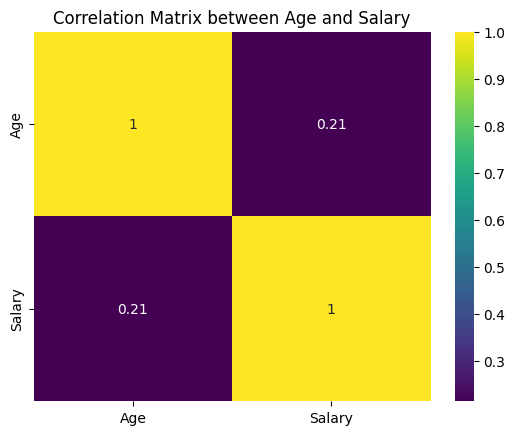

In [104]:
df2=df.drop(df.columns[[0,1,2,3,5,6,7]],axis=1)   
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap="viridis")
plt.title("Correlation Matrix between Age and Salary")
plt.show()

correlation matrix using heat map